# Face Recognition using CNN

In [15]:
# Import libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
# 'np_utils' sudah dihapus dan digantikan 'to_catergorical'
from keras.utils import to_categorical
import itertools

Load dataset

In [16]:
! gdown 17w6YaY6O7zHpgQie4rluZIo6ZcrBt-gt

Downloading...
From: https://drive.google.com/uc?id=17w6YaY6O7zHpgQie4rluZIo6ZcrBt-gt
To: /content/ORL_faces.npz
100% 33.0M/33.0M [00:00<00:00, 231MB/s]


In [17]:
# Load dataset
data = np.load('ORL_faces.npz')

# Load the "Train Images"
x_train = data['trainX']
# normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# Load the label of images
y_train = data['trainY']
y_test = data['testY']

# Show the train and test Data format
print('x_train :{}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train :[[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14

Split DataSet: Validation data and Train

In [18]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,
)

for using the CNN, we need to cange the size of images (The size of images must be the same)

In [19]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (160,)


Build CNN model: have 3 main layer:


*   1-Convolotional layer
*   2-pooling layer
*   3-fully connected layer

we could build a new architecture of CNN by changing the number and position of layer





Shows the model's paramenters.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# filters= the depth of output image or kernels

cnn_model = Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),  # ganti lr dengan learning_rate
    metrics=['accuracy']
)


In [21]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 53, 43, 36)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 19, 54)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 24624)             0         
                                                                 
 dense_4 (Dense)             (None, 2024)             

Train the Model


In [22]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/250
1/1 - 12s - loss: 3.0130 - accuracy: 0.0395 - val_loss: 3.0069 - val_accuracy: 0.0000e+00 - 12s/epoch - 12s/step
Epoch 2/250
1/1 - 8s - loss: 2.9983 - accuracy: 0.0482 - val_loss: 3.0047 - val_accuracy: 0.0000e+00 - 8s/epoch - 8s/step
Epoch 3/250
1/1 - 10s - loss: 3.0055 - accuracy: 0.0789 - val_loss: 2.9985 - val_accuracy: 0.0000e+00 - 10s/epoch - 10s/step
Epoch 4/250
1/1 - 9s - loss: 2.9940 - accuracy: 0.0746 - val_loss: 2.9927 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 5/250
1/1 - 9s - loss: 2.9991 - accuracy: 0.0482 - val_loss: 2.9908 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 6/250
1/1 - 10s - loss: 2.9843 - accuracy: 0.0614 - val_loss: 2.9897 - val_accuracy: 0.0000e+00 - 10s/epoch - 10s/step
Epoch 7/250
1/1 - 8s - loss: 2.9659 - accuracy: 0.0965 - val_loss: 2.9864 - val_accuracy: 0.0000e+00 - 8s/epoch - 8s/step
Epoch 8/250
1/1 - 10s - loss: 2.9601 - accuracy: 0.0789 - val_loss: 2.9862 - val_accuracy: 0.0000e+00 - 10s/epoch - 10s/step
Epoch 9/250


In [23]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.2964
test acc 0.9500


plot the result

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


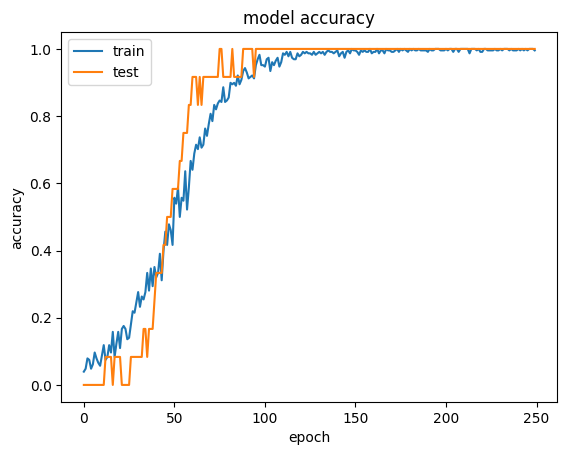

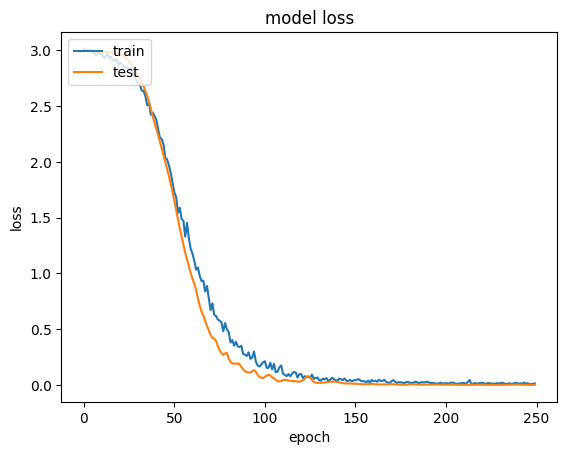

In [24]:
# list all data in history
print(history.history.keys())
# sumarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# sumarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plot Confusion Matrix

In [25]:
# import utils
from keras import utils

predicted =np.array( cnn_model.predict(x_test))
# print(predicted)
# print(y_test)
# ynew = cnn_model.predict_classes(x_test)
ynew = np.argmax(cnn_model.predict(x_test), axis=-1)


Acc=accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)
# /tn, fp, fn, tp = confusion_matrix(np.array(y_test), ynew).ravel()
cnf_matrix=confusion_matrix(np.array(y_test), ynew)

y_test1 = utils.to_categorical(y_test, 20)

5/5 [==============================] - 2s 288ms/step
accuracy : 
0.95


In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
Confusion matrix, without normalization


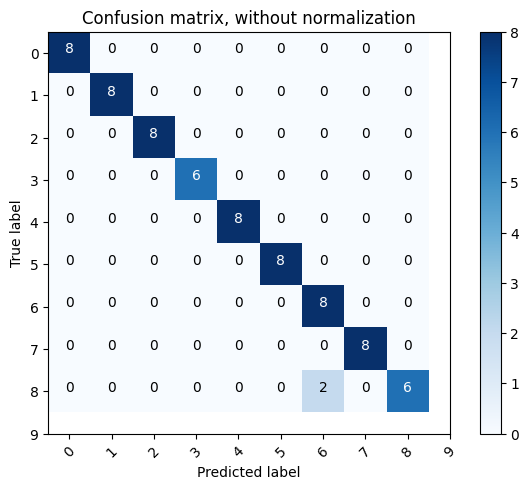

Confusion matrix, without normalization


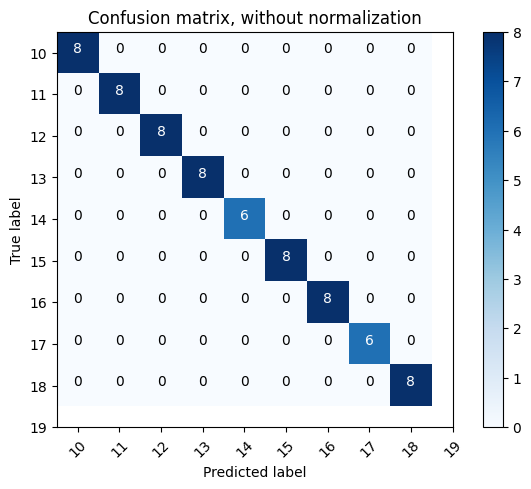

Confusion matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1

In [27]:
print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))